<a href="https://colab.research.google.com/github/muhammadfawad538/AI-ML--supervised-unspervised/blob/main/Salary_prediction_on_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
df = pd.read_csv("Salary_dataset.csv")



In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.size

90

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.sample(5)

,YearsExperience,Salary
0,1.2,39344.0
5,3.0,56643.0
20,6.9,91739.0
26,9.6,116970.0
13,4.2,57082.0


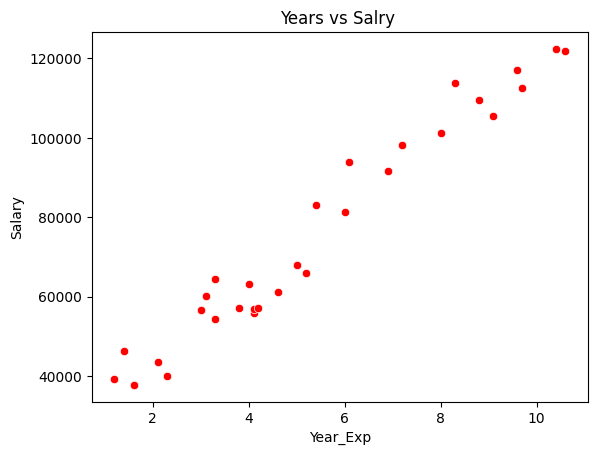

In [ ]:
import seaborn as sns
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='red')
plt.xlabel('Year_Exp')
plt.ylabel('Salary')
plt.title("Years vs Salry ")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dataset = df.copy()

In [ ]:
model = LinearRegression()
X = dataset[['YearsExperience']]
y = dataset['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred


array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 49830096.86
R-squared (R2): 0.90


In [ ]:
# Print the model's coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")

Intercept: 24380.20
Slope: 9423.82


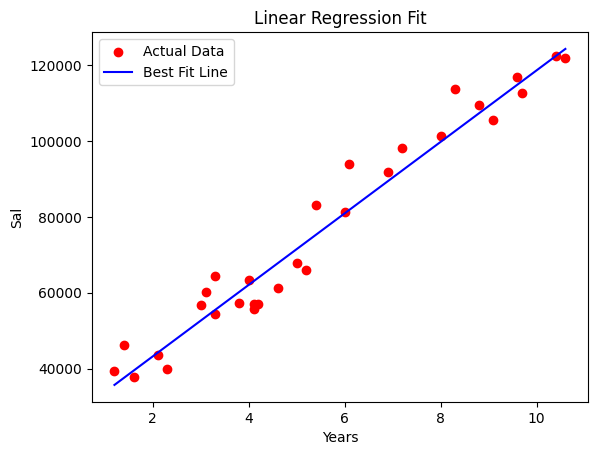

In [ ]:
# Sort the data points by 'YearsExperience' for a smoother line
sorted_dataset = dataset.sort_values(by=['YearsExperience'])

# Plot the original data points
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='red', label='Actual Data')

# Plot the regression line using sorted data for a smoother line
plt.plot(sorted_dataset['YearsExperience'], model.predict(sorted_dataset[['YearsExperience']]), color='blue', label='Best Fit Line')

plt.xlabel('Years')
plt.ylabel('Sal')
plt.title("Linear Regression Fit")
plt.legend()